<a href="https://colab.research.google.com/github/dexter11235813/EVA_5/blob/main/assignment_9/assignment_9_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from os.path import join

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_9'

/content/drive/My Drive/EVA5/EVA_5/assignment_9


In [5]:
!ls

assignment_9_nb.ipynb  dataloader.py  __pycache__  show_images_from_batch.py
config.py	       images	      README.md    transforms.py
data		       model.py       run.py


In [209]:
!git pull origin main

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/dexter11235813/EVA_5
 * branch            main       -> FETCH_HEAD
   9c297ab..06c543d  main       -> origin/main
Updating 9c297ab..06c543d
Fast-forward
 assignment_9/grad_cam.py | 62 ++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 62 insertions(+)
 create mode 100644 assignment_9/grad_cam.py


#MAIN CODE

In [210]:
%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_9'
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import dataloader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import OneCycleLR
import show_images_from_batch
import grad_cam
importlib.reload(model)
importlib.reload(config)
importlib.reload(dataloader)
importlib.reload(show_images_from_batch)
importlib.reload(grad_cam)

import warnings
warnings.filterwarnings('ignore')

/content/drive/My Drive/EVA5/EVA_5/assignment_9


In [7]:
net = model.ResNet18().to(config.DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
train_loader, test_loader = dataloader.get_iterators()

Files already downloaded and verified
Files already downloaded and verified


In [8]:
summary(net, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

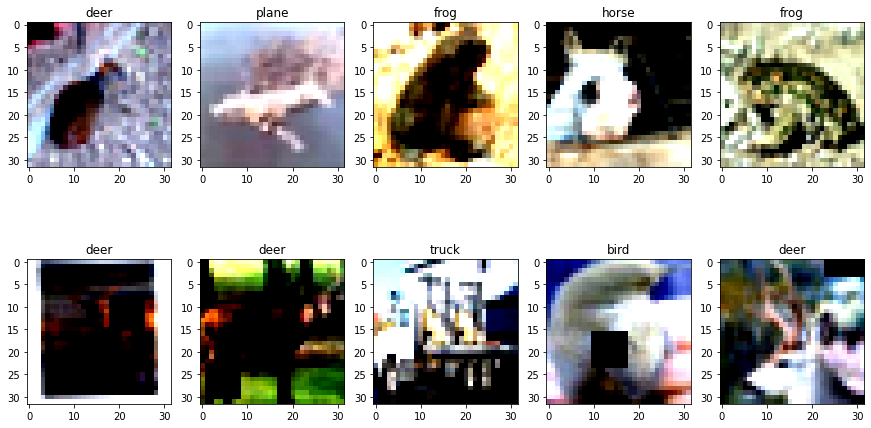

In [9]:
show_images_from_batch.get_images(train_loader)


In [10]:

first_run_cutout = model.Trial(
    name="first_run_cutout",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "device": config.DEVICE,
        "loss_fn": criterion,
        "scheduler": scheduler
    },
)

first_run_cutout.run()
print("Done!")

  0%|          | 1/782 [00:00<01:59,  6.54it/s]

1 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.15it/s]

 Training loss = 0.02133163996040821, Training Accuracy : 50.434


  0%|          | 2/782 [00:00<01:09, 11.17it/s]

 Test loss = 1.1310515687942504, Test Accuracy : 59.57
2 / 20


  3%|▎         | 5/157 [00:00<00:03, 41.22it/s]

 Training loss = 0.015796873718500137, Training Accuracy : 64.516


  0%|          | 2/782 [00:00<01:13, 10.62it/s]

 Test loss = 0.821443210887909, Test Accuracy : 71.39
3 / 20


  3%|▎         | 4/157 [00:00<00:04, 38.21it/s]

 Training loss = 0.012834344990551472, Training Accuracy : 71.82


  0%|          | 2/782 [00:00<01:15, 10.35it/s]

 Test loss = 0.6884307371139526, Test Accuracy : 76.88
4 / 20


  3%|▎         | 5/157 [00:00<00:03, 41.41it/s]

 Training loss = 0.009836141020059586, Training Accuracy : 78.23


  0%|          | 2/782 [00:00<01:15, 10.35it/s]

 Test loss = 0.5705297055244446, Test Accuracy : 80.85
5 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.47it/s]

 Training loss = 0.008188067935407162, Training Accuracy : 82.024


  0%|          | 2/782 [00:00<01:16, 10.16it/s]

 Test loss = 0.5389392351150513, Test Accuracy : 82.15
6 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.21it/s]

 Training loss = 0.0068085272796452045, Training Accuracy : 85.038


  0%|          | 2/782 [00:00<01:16, 10.19it/s]

 Test loss = 0.464102686214447, Test Accuracy : 84.4
7 / 20


  3%|▎         | 5/157 [00:00<00:03, 40.33it/s]

 Training loss = 0.005699099041521549, Training Accuracy : 87.362


  0%|          | 2/782 [00:00<01:16, 10.18it/s]

 Test loss = 0.5510908714294434, Test Accuracy : 82.14
8 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.72it/s]

 Training loss = 0.004891941789537668, Training Accuracy : 89.13


  0%|          | 2/782 [00:00<01:17, 10.09it/s]

 Test loss = 0.44426115827560425, Test Accuracy : 85.51
9 / 20


  3%|▎         | 5/157 [00:00<00:03, 43.94it/s]

 Training loss = 0.004157362040132284, Training Accuracy : 90.912


  0%|          | 2/782 [00:00<01:13, 10.60it/s]

 Test loss = 0.4545352090358734, Test Accuracy : 85.81
10 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.86it/s]

 Training loss = 0.0035247893538326025, Training Accuracy : 92.098


  0%|          | 2/782 [00:00<01:13, 10.56it/s]

 Test loss = 0.40246718769073486, Test Accuracy : 87.06
11 / 20


  3%|▎         | 5/157 [00:00<00:03, 41.96it/s]

 Training loss = 0.0029020211659371853, Training Accuracy : 93.5


  0%|          | 2/782 [00:00<01:16, 10.23it/s]

 Test loss = 0.42054536705017087, Test Accuracy : 87.39
12 / 20


  3%|▎         | 5/157 [00:00<00:03, 43.08it/s]

 Training loss = 0.0024036243557929993, Training Accuracy : 94.762


  0%|          | 2/782 [00:00<01:17, 10.08it/s]

 Test loss = 0.4484637975692749, Test Accuracy : 86.46
13 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.77it/s]

 Training loss = 0.0019429901149123907, Training Accuracy : 95.682


  0%|          | 2/782 [00:00<01:16, 10.21it/s]

 Test loss = 0.41413942546844484, Test Accuracy : 88.31
14 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.79it/s]

 Training loss = 0.001455690828152001, Training Accuracy : 96.842


  0%|          | 2/782 [00:00<01:17, 10.11it/s]

 Test loss = 0.4021709227561951, Test Accuracy : 89.17
15 / 20


  3%|▎         | 4/157 [00:00<00:03, 38.83it/s]

 Training loss = 0.0011105842422693968, Training Accuracy : 97.618


  0%|          | 2/782 [00:00<01:15, 10.30it/s]

 Test loss = 0.4085815731048584, Test Accuracy : 89.09
16 / 20


  3%|▎         | 5/157 [00:00<00:03, 40.98it/s]

 Training loss = 0.0006669930298812687, Training Accuracy : 98.592


  0%|          | 2/782 [00:00<01:15, 10.33it/s]

 Test loss = 0.4223119631767273, Test Accuracy : 89.59
17 / 20


  3%|▎         | 5/157 [00:00<00:03, 40.98it/s]

 Training loss = 0.0004953862517140806, Training Accuracy : 98.968


  0%|          | 2/782 [00:00<01:16, 10.18it/s]

 Test loss = 0.4422124307632446, Test Accuracy : 89.5
18 / 20


  3%|▎         | 4/157 [00:00<00:04, 37.71it/s]

 Training loss = 0.00034333812072873116, Training Accuracy : 99.33


  0%|          | 2/782 [00:00<01:16, 10.13it/s]

 Test loss = 0.41915765972137453, Test Accuracy : 89.96
19 / 20


  3%|▎         | 5/157 [00:00<00:03, 43.66it/s]

 Training loss = 0.0002564991591498256, Training Accuracy : 99.488


  0%|          | 2/782 [00:00<01:16, 10.20it/s]

 Test loss = 0.41607466975450513, Test Accuracy : 90.29
20 / 20


  3%|▎         | 5/157 [00:00<00:03, 42.47it/s]

 Training loss = 0.00021844767616130412, Training Accuracy : 99.614


100%|██████████| 157/157 [00:03<00:00, 40.94it/s]

 Test loss = 0.41975257477760314, Test Accuracy : 90.29
Done!


100%|██████████| 157/157 [00:03<00:00, 40.00it/s]


plot saved at ./images/correctly_classified_images.png


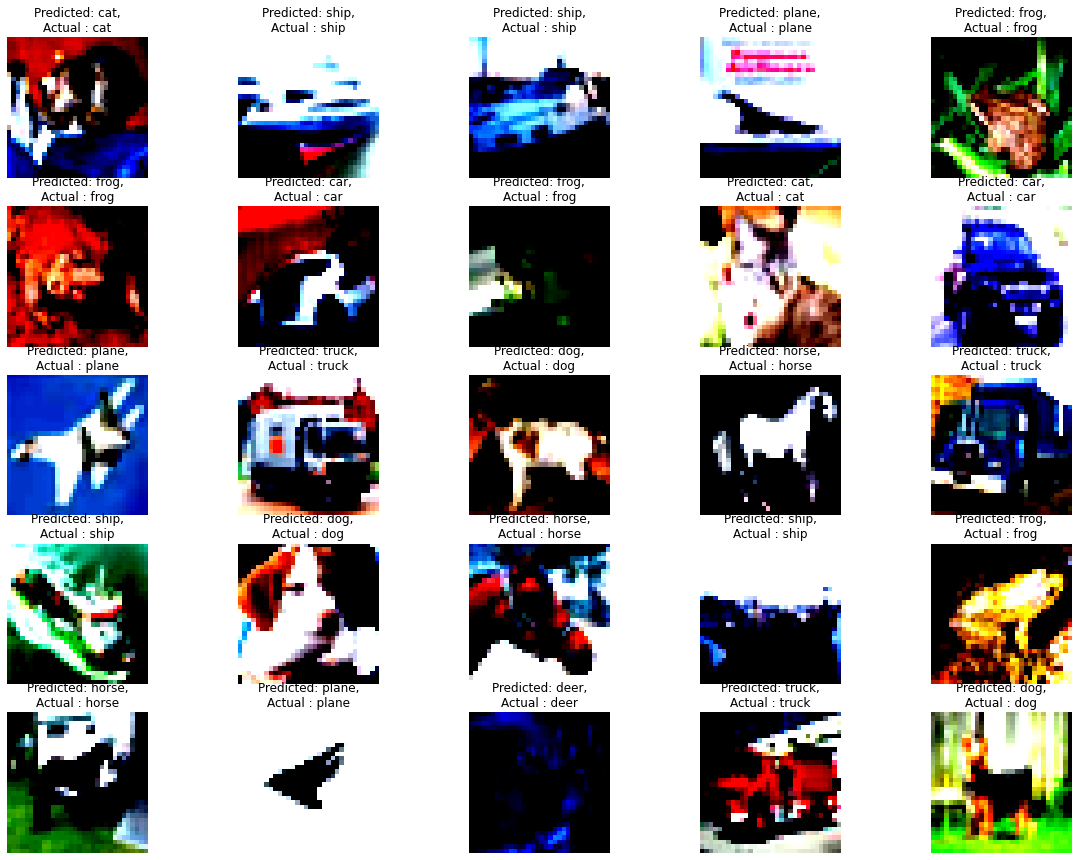

In [12]:
show_images_from_batch.plot_images_by_classification(25, first_run_cutout.model, test_loader, config.DEVICE, misclassified=False)


100%|██████████| 157/157 [00:03<00:00, 40.91it/s]


plot saved at ./images/misclassified_images.png


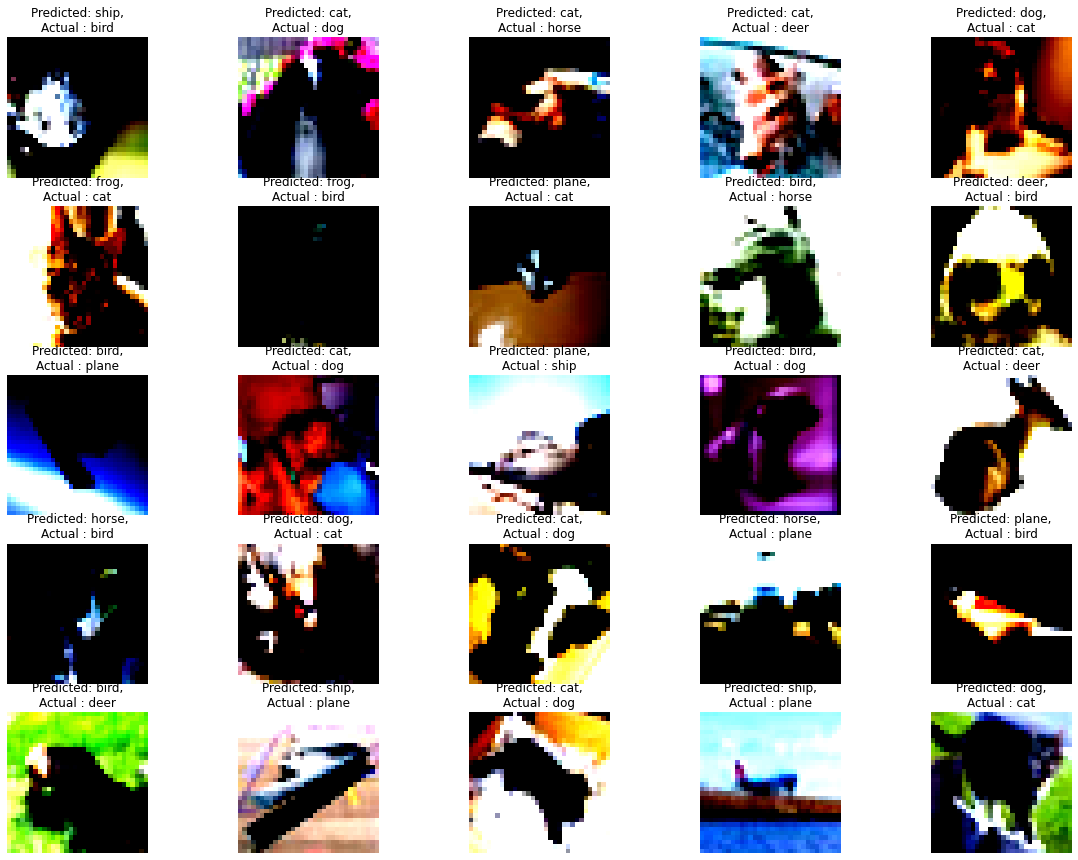

In [13]:
show_images_from_batch.plot_images_by_classification(25, first_run_cutout.model, test_loader, config.DEVICE)


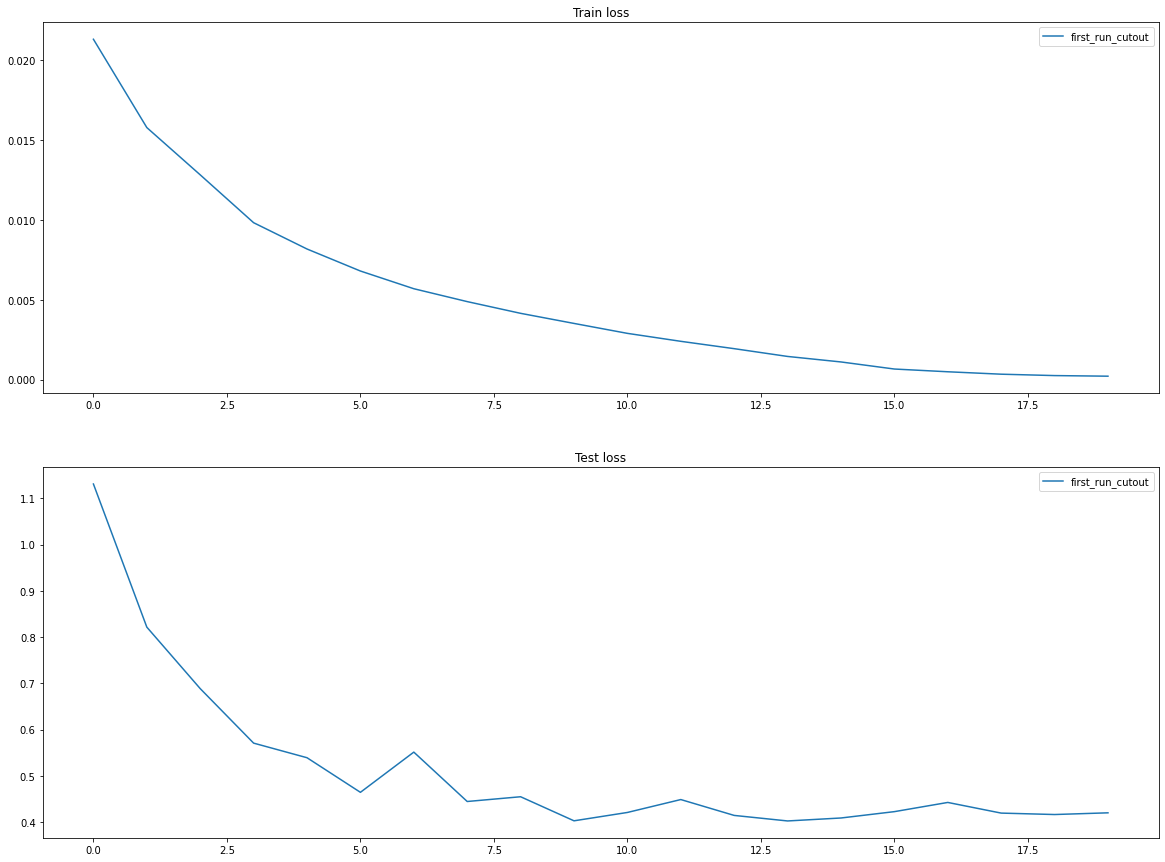

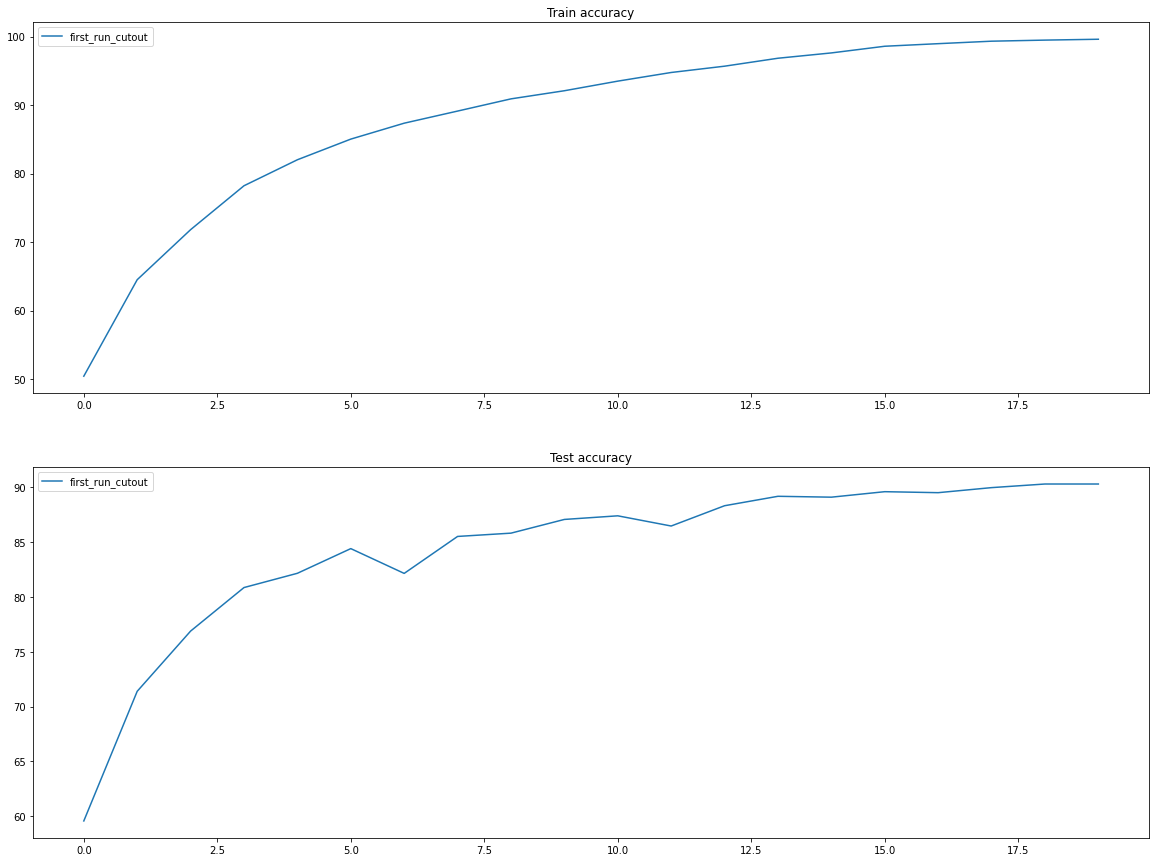

In [14]:
show_images_from_batch.plot_curves_for_trials(first_run_cutout)

# GRAD-CAM

100%|██████████| 157/157 [00:03<00:00, 40.30it/s]


plot saved at ./images/correctly_classified_images_cam.png


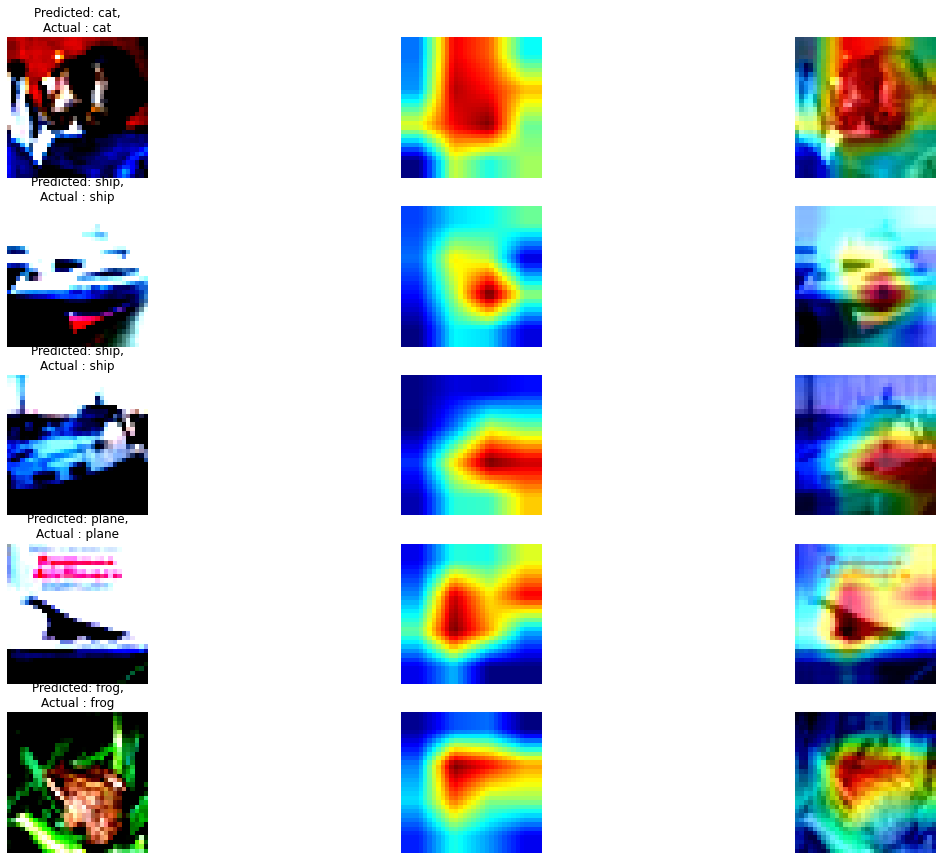

In [212]:
grad_cam.plot_grad_cam(number=5, model=first_run_cutout.model,test_loader=test_loader, device=config.DEVICE, misclassified=False)

100%|██████████| 157/157 [00:03<00:00, 40.89it/s]


plot saved at ./images/misclassified_images_cam.png


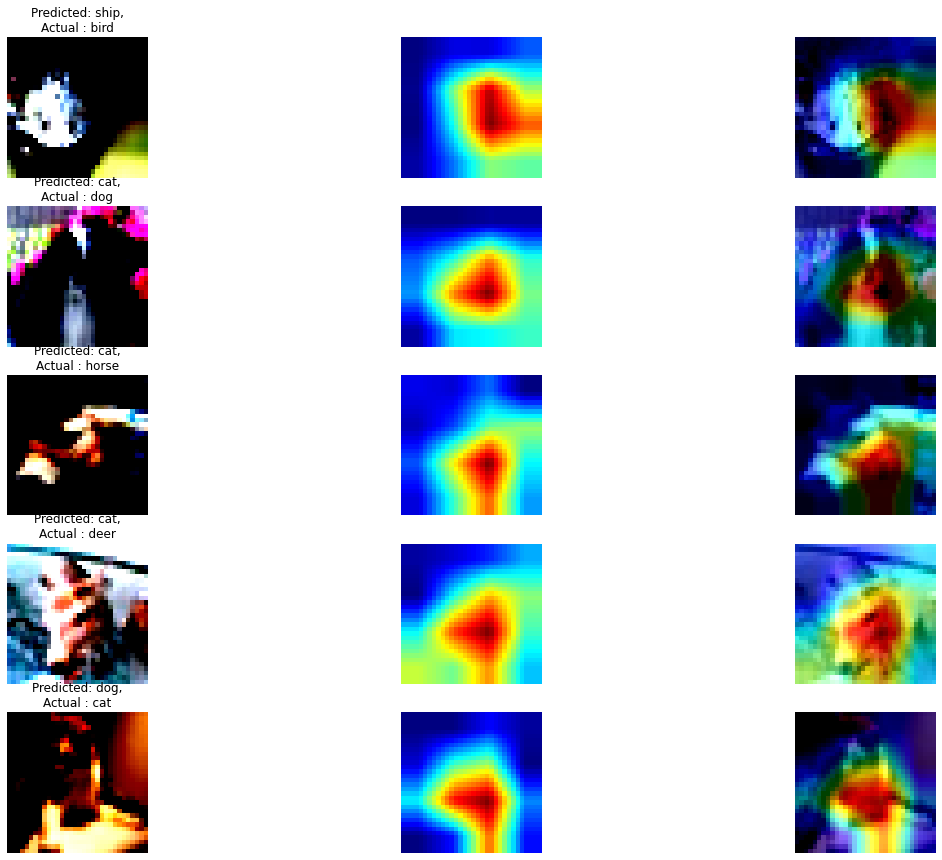

In [213]:
grad_cam.plot_grad_cam(number=5, model=first_run_cutout.model,test_loader=test_loader, device=config.DEVICE, misclassified=True)